## モデル式とは
モデルの中から目的変数と説明変数を抜き出して表現したもの
<img src="http://images.pyq.jp/python_ml_middle/ml_reg_04.png" width=500>
画像引用元：[Python学習チャンネルbyPyQ](https://blog.pyq.jp/entry/news_curriculum_180703)

In [1]:
%matplotlib inline
%precision 3
import numpy as np, pandas as pd, matplotlib.pyplot as plt
# モデル式を扱うため。dmatrixは右辺の説明変数のみを指定する
from patsy import dmatrix
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
pd.set_option('display.precision', 3)  # 小数点以下3桁に

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [3]:
# 目的変数と各説明変数との相関係数
Xy = X.assign(MEDV=y) # 目的変数の列 MEDVを追加
Xy.corr().MEDV

CRIM      -0.386
ZN         0.360
INDUS     -0.484
CHAS       0.175
NOX       -0.427
RM         0.695
AGE       -0.377
DIS        0.250
RAD       -0.382
TAX       -0.469
PTRATIO   -0.508
B          0.333
LSTAT     -0.738
MEDV       1.000
Name: MEDV, dtype: float64

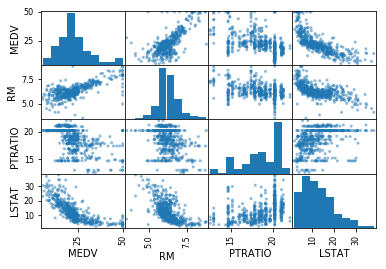

In [4]:
# 散布図行列を確認
scatter_matrix(Xy[['MEDV', 'RM', 'PTRATIO', 'LSTAT']]);

In [5]:
# モデル式から説明変数の表を作成
# -1はy切片を0にするという意味
X1 = dmatrix('RM+PTRATIO+LSTAT-1', data=X, return_type='dataframe')
X1[:1]

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98


In [6]:
# 線形回帰でクロスバリデーション
scores = cross_val_score(LinearRegression(), X1, y, cv=6)
score1 = scores.mean()
float(score1)

0.472

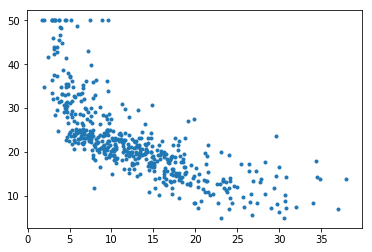

In [7]:
# LSTATと MEDVの関係
plt.plot(Xy.LSTAT, Xy.MEDV, '.');

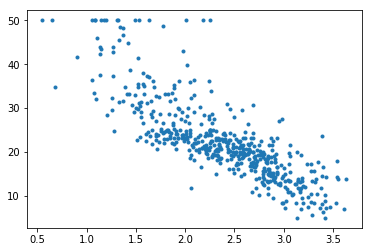

In [8]:
# 上のグラフが指数分布に見えるので対数をとってみた。結果直線に近くなった
plt.plot(np.log(Xy.LSTAT), Xy.MEDV, '.');

In [15]:
# '...'というモデル式を指定すると'...-1'と解釈させるため、-1をするとy切片がなくなる
X2 = dmatrix('RM + PTRATIO + np.log(LSTAT) -1', data=X, return_type='dataframe')
X2[:1]

,RM,PTRATIO,np.log(LSTAT)
0,6.575,15.3,1.605


In [10]:

scores = cross_val_score(LinearRegression(), X2, y, cv=6)
score2 = scores.mean()
float(score2)

0.549

In [11]:
# モデル式から説明変数の表を作成
X3 = dmatrix('RM * PTRATIO + np.log(LSTAT) - 1', data=X,
             return_type='dataframe')
# RM * PTRATIOとしたことでRM:PTRATIO列が追加される
X3[:2]

,RM,PTRATIO,RM:PTRATIO,np.log(LSTAT)
0,6.575,15.3,100.598,1.605
1,6.421,17.8,114.294,2.213


In [12]:
# 線形回帰でクロスバリデーション
scores = cross_val_score(LinearRegression(), X3, y, cv=6)
score3 = scores.mean()
score3

0.6252662943287763

In [13]:
# RM:PTRATIO は、RM * PTRATIO
(X3['RM:PTRATIO'] == X3.RM*X3.PTRATIO).all()

True

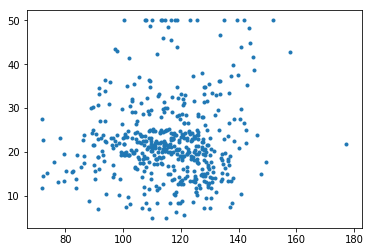

In [14]:
# 散布図をみてみると相関が高くないため、決定係数がよくなったのは偶然の可能性が高い
plt.plot(Xy.RM*Xy.PTRATIO, Xy.MEDV, '.');